In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import tensorflow as tf
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Usando o Yahoo Finance para baixar os dados históricos do Bitcoin (BTC-USD)
dados = yf.download('BTC-USD', start='2014-01-01', end='2024-11-11')

# Pré-processamento de dados
dados = dados[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
dados

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-11-06,75639.078125
2024-11-07,75904.859375


In [ ]:
dados = dados.dropna()
dados = dados.drop_duplicates()

In [ ]:
# Padronização dos dados para melhorar a performance do modelo
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)

In [ ]:
# Função para criar os dados de entrada e saída
def create_dataset(data, time_step=300):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Criar os dados de treino e teste
X, y = create_dataset(dados_scaled)

In [ ]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Modelos a serem testados
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=2),
    "SVR": SVR(kernel='linear'),
    "XGBoost": XGBRegressor(),
}

# Loop para treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)
    # Prevendo os preços
    predictions = model.predict(X_test)
    # Calculando as métricas
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MAE": mae, "R²": r2}

# Exibindo os resultados
print("Resultados dos Modelos:")
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, R² = {metrics['R²']:.2f}")

Resultados dos Modelos:
Linear Regression: MAE = 0.05, R² = 0.99
Ridge Regression: MAE = 0.04, R² = 0.99
Lasso Regression: MAE = 0.23, R² = 0.90
Random Forest: MAE = 0.09, R² = 0.97
Decision Tree: MAE = 0.19, R² = 0.90
KNN Regressor: MAE = 0.90, R² = -0.28
SVR: MAE = 0.06, R² = 0.99
XGBoost: MAE = 0.15, R² = 0.94


In [ ]:
# Teste com o modelo SVR e ajuste de parâmetros
model_SVR = SVR(kernel='linear')
model_SVR.fit(X_train, y_train)

# Previsões com o modelo
y_pred_SVR = model_SVR.predict(X_test)

In [ ]:
# Teste com o modelo SVR e ajuste de parâmetros
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)

# Previsões com o modelo
y_pred_LinearRegression = model_LinearRegression.predict(X_test)

In [ ]:
# Teste com o modelo SVR e ajuste de parâmetros
model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)

# Previsões com o modelo
y_pred_Ridge = model_Ridge.predict(X_test)

In [ ]:
# Inverter a padronização dos dados
predicted_price_LinearRegression = scaler.inverse_transform(y_pred_LinearRegression.reshape(-1, 1))
predicted_price_SVR = scaler.inverse_transform(y_pred_SVR.reshape(-1, 1))
predicted_price_Ridge = scaler.inverse_transform(y_pred_Ridge.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

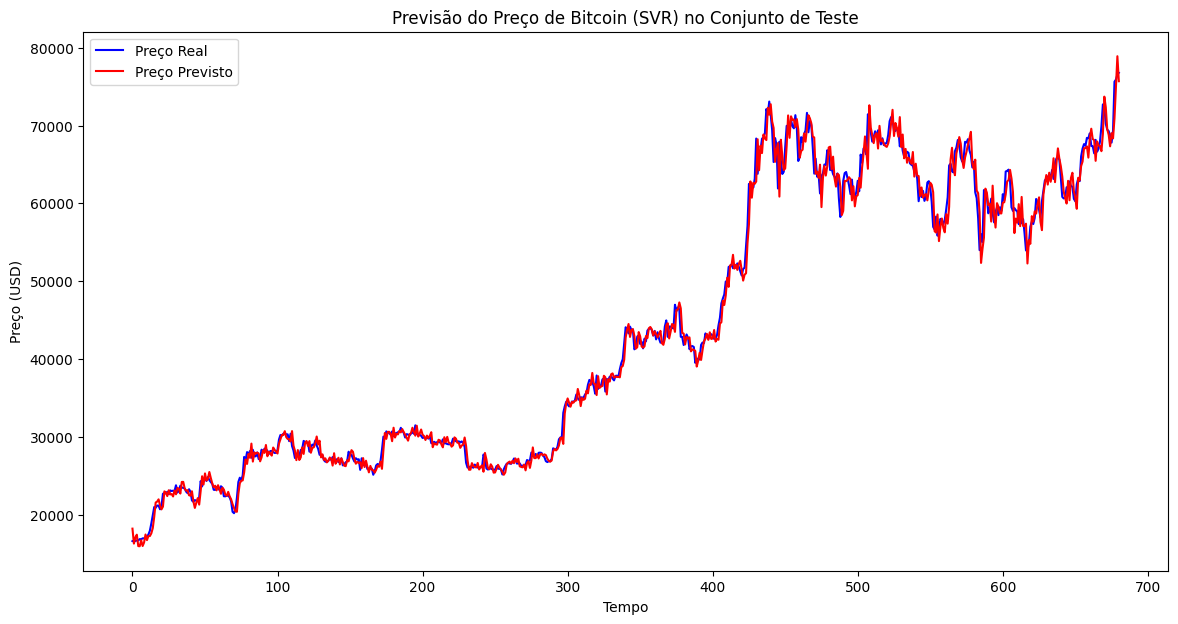

In [ ]:
# Visualizar os resultados do conjunto de teste
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Preço Real')
plt.plot(predicted_price_LinearRegression, color='red', label='Preço Previsto')
plt.title('Previsão do Preço de Bitcoin (SVR) no Conjunto de Teste')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

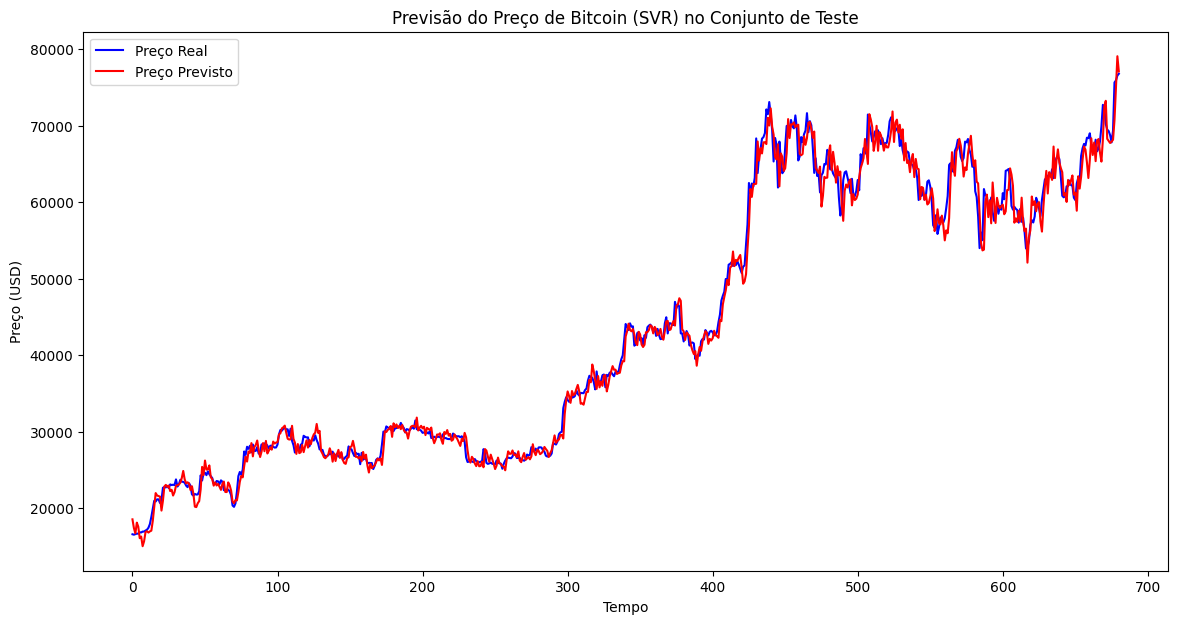

In [ ]:
# Visualizar os resultados do conjunto de teste
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Preço Real')
plt.plot(predicted_price_SVR, color='red', label='Preço Previsto')
plt.title('Previsão do Preço de Bitcoin (SVR) no Conjunto de Teste')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

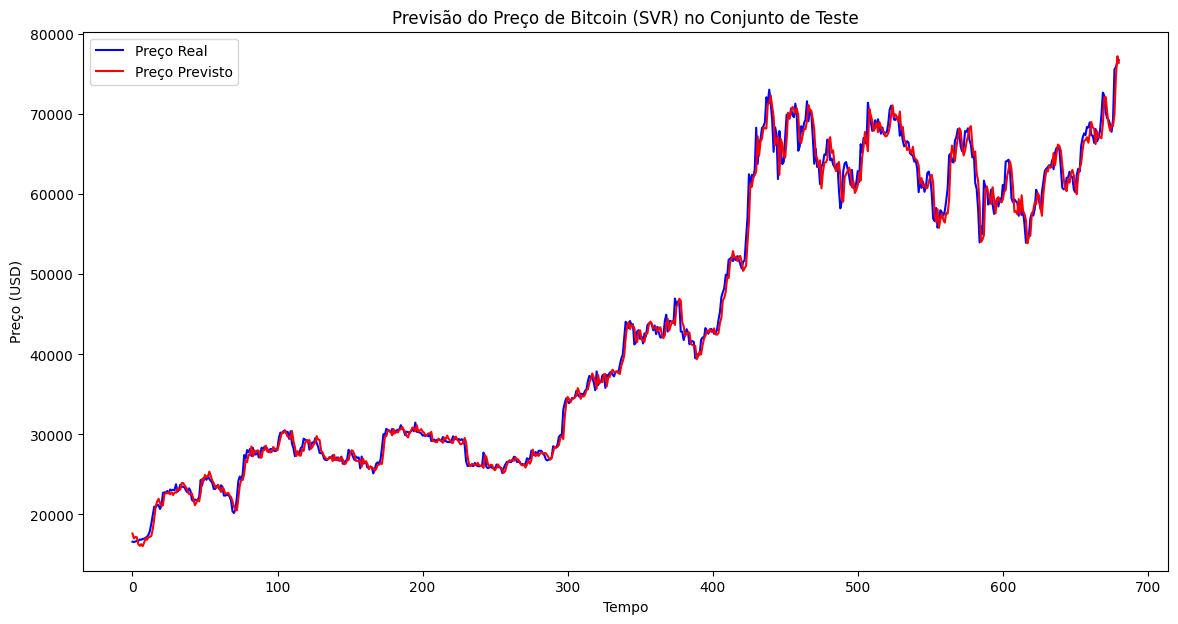

In [ ]:
# Visualizar os resultados do conjunto de teste
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Preço Real')
plt.plot(predicted_price_Ridge, color='red', label='Preço Previsto')
plt.title('Previsão do Preço de Bitcoin (SVR) no Conjunto de Teste')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

In [ ]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Configurando os dados de entrada (normalizados, se necessário)
X_train_rnn = np.expand_dims(X_train, axis=2)  # Expande a dimensão para 3D exigido pelas RNNs
X_test_rnn = np.expand_dims(X_test, axis=2)

In [ ]:
def build_simple_rnn(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(32, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(1))  # Camada de saída com 1 unidade para regressão
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Construir o modelo Simple RNN
model_simple_rnn = build_simple_rnn(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))

# Treinamento do modelo
model_simple_rnn.fit(X_train_rnn, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Fazendo previsões
predictions_rnn = model_simple_rnn.predict(X_test_rnn).flatten()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.2735 - val_loss: 0.0488
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0031 - val_loss: 0.0086
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0020 - val_loss: 0.0069
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0016 - val_loss: 0.0081
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0019 - val_loss: 0.0064
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0019 - val_loss: 0.0066
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0015 - val_loss: 0.0068
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0017 - val_loss: 0.0065
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0014 - val_l

In [ ]:
# Exibindo as métricas
mae_rnn = mean_absolute_error(y_test, predictions_rnn)
r2_rnn = r2_score(y_test, predictions_rnn)
print(f"Simple RNN - MAE: {mae_rnn:.2f}, R²: {r2_rnn:.2f}")

Simple RNN - MAE: 0.06, R²: 0.99


In [ ]:
def build_lstm(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(32, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(1))  # Camada de saída com 1 unidade para regressão
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Construir o modelo LSTM
model_lstm = build_lstm(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))

# Treinamento do modelo
model_lstm.fit(X_train_rnn, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Fazendo previsões
predictions_lstm = model_lstm.predict(X_test_rnn).flatten()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 39296.1133 - val_loss: 0.3848
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.2413 - val_loss: 0.3241
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.1457 - val_loss: 0.2660
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.1087 - val_loss: 0.2147
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0790 - val_loss: 0.1727
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 767742.4375 - val_loss: 0.2375
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 0.1216 - val_loss: 0.2290
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.1006 - val_loss: 0.2023
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0894 - val_loss: 0.1780
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0742 - val_loss: 0.1567
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 0.0628 - val_loss: 0.1363
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/s

In [ ]:
# Exibindo as métricas
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
r2_lstm = r2_score(y_test, predictions_lstm)
print(f"LSTM - MAE: {mae_lstm:.2f}, R²: {r2_lstm:.2f}")

LSTM - MAE: 0.21, R²: 0.92


In [ ]:
def build_gru(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(32, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(1))  # Camada de saída com 1 unidade para regressão
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Construir o modelo GRU
model_gru = build_gru(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))

# Treinamento do modelo
model_gru.fit(X_train_rnn, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Fazendo previsões
predictions_gru = model_gru.predict(X_test_rnn).flatten()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - loss: 0.4183 - val_loss: 0.4324
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0358 - val_loss: 0.0123
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 0.0029 - val_loss: 0.0073
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - loss: 0.0016 - val_loss: 0.0076
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - loss: 0.0016 - val_loss: 0.0058
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/ste

In [ ]:
# Exibindo as métricas
mae_gru = mean_absolute_error(y_test, predictions_gru)
r2_gru = r2_score(y_test, predictions_gru)
print(f"GRU - MAE: {mae_gru:.2f}, R²: {r2_gru:.2f}")

GRU - MAE: 0.08, R²: 0.99


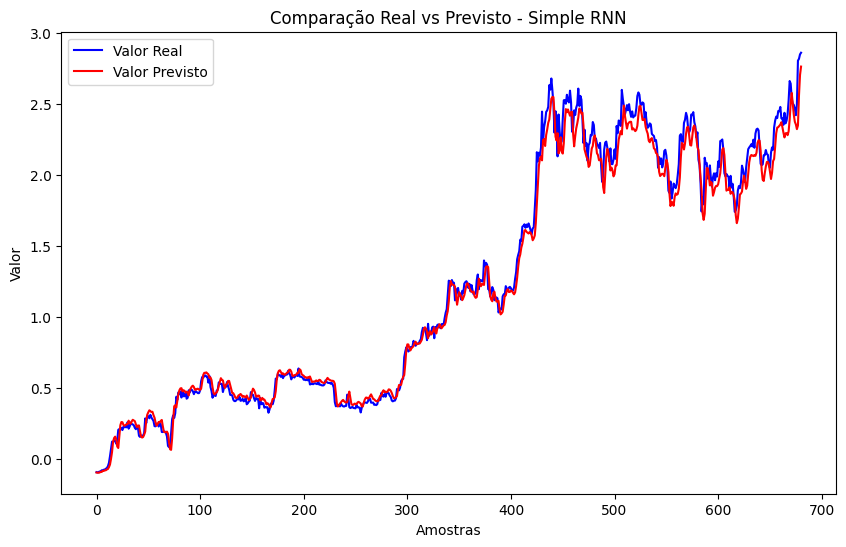

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real', color='blue')
plt.plot(predictions_rnn, label='Valor Previsto', color='red')
plt.title('Comparação Real vs Previsto - Simple RNN')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.show()

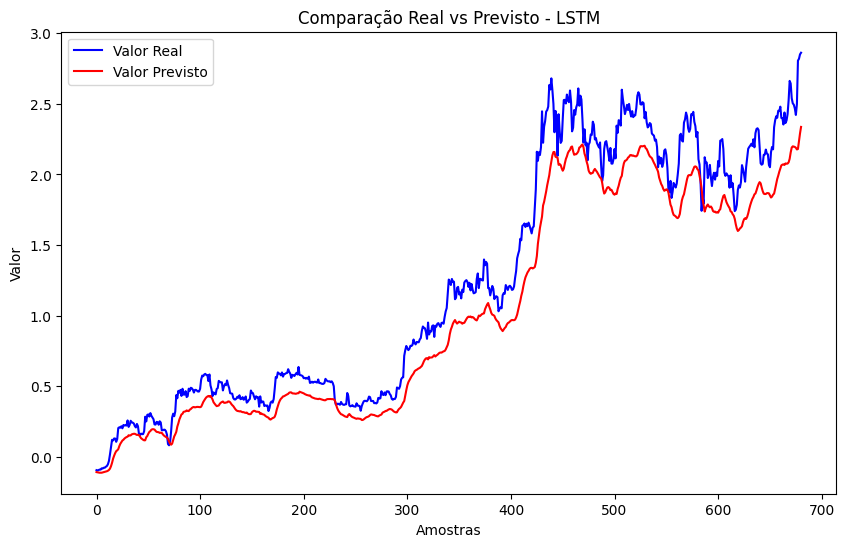

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real', color='blue')
plt.plot(predictions_lstm, label='Valor Previsto', color='red')
plt.title('Comparação Real vs Previsto - LSTM')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.show()

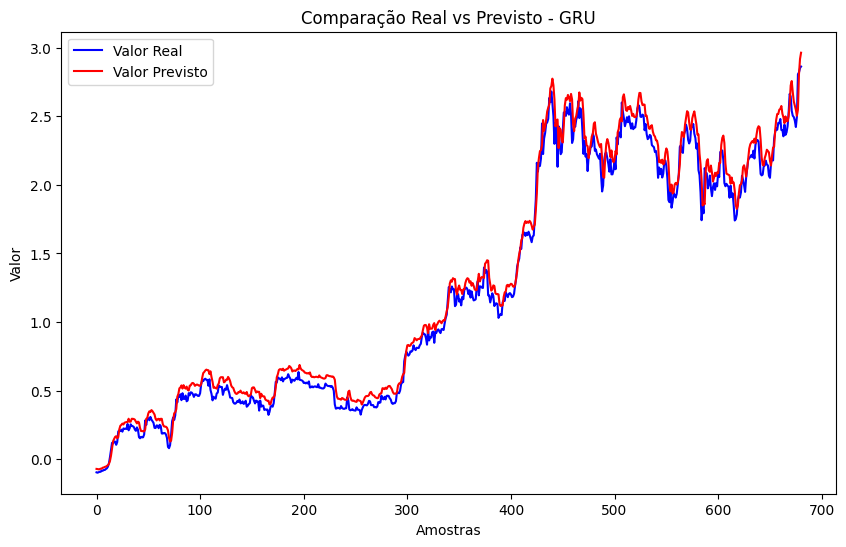

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real', color='blue')
plt.plot(predictions_gru, label='Valor Previsto', color='red')
plt.title('Comparação Real vs Previsto - GRU')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.show()